# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: In this dataset, we have 6 features corresponding to categories of grocery products. However, inspection of the dataset features as we have done above clearly reveals that there would be correlation among these features i.e., for e.g., same businesses are definitely likely to buy grocery and detergents and paper together.

PCA can help us reveal any correlation structure, if it exists, among these 6 features. 
The first few principal component (PC) loading vectors might show which features are more correlated with each other, i.e., the PC loading vectors corresponding to each of the 6 features plotted along the PC axes would help us identify any correlated groups of features. 

ICA would be help us find a set of statistically independent features which are linear combinations of the given features to represent our dataset. The assumption is that the given features are statistically dependent and hence ICA finds a set of statistically independent features to represent the same dataset. 

### PCA

In [23]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
#from sklearn import preprocessing
#scaler = preprocessing.StandardScaler().fit(data)
pca = PCA(n_components=data.shape[1], whiten=True)
pca.fit(scaler.transform(data))
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The first two dimensions account for about 86.5% of the variance in the data. After the first two dimensions, the explained variance ratio drops off rapidly. This is shown in the plot below which shows the explained variance ratio as well as the rate of change of the explained variance ratio (first derivative, x[n] - x[n-1]). From the plot, we clearly see the dominance of the first two principal components. Hence the choice for the number of dimensions = 2 for PCA analysis on this dataset. 

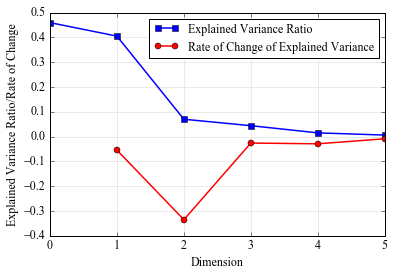

In [24]:
fig_1 = plt.figure()
plt.plot(pca.explained_variance_ratio_, '-sb', lw=1.5, label='Explained Variance Ratio')
plt.plot(np.arange(1, 6), np.diff(pca.explained_variance_ratio_), '-or', lw=1.5, 
         label='Rate of Change of Explained Variance')

plt.ylabel('Explained Variance Ratio/Rate of Change')
plt.xlabel('Dimension')
plt.grid(True, ls='-', which='both', color='0.85')
plt.legend(loc=1)
fig_1.axes[0].set_axisbelow(True)

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: To answer this question, we create a biplot (shown below) i.e., a plot showing the first two principal component loading vectors for all the 6 features (shown in blue) and the projections of each 6-dimensional sample vector onto the 2-d feature PC feature space (shown as red dots).  From the figure, we observe clearly that the 6 categories of products can be split up into two highly correlated groups. One group contains 'Grocery', 'Milk' and 'Detergents_Paper' products and the other contains 'Fresh Food', 'Frozen Food'. The first group corresponds to a larger projection onto the PC2 (vertical) axis and the second group corresponds to a larger projection onto the PC1 (horizontal) axis. 

We also observe from the figure that there is large number of customers that spend small amounts on both groups of grocery products. These are the points clustered around the right bottom corner (quadrant) of the figure. There are also few large volume customers who spend large amounts on either group of grocery products. These are the points to the left and top of the figure.  

Thus PCA reveals to us that there clearly exists two kinds of customers in our dataset,
* large businesses (fewer in count relatively)
* smaller family run shops (larger number in count relatively)

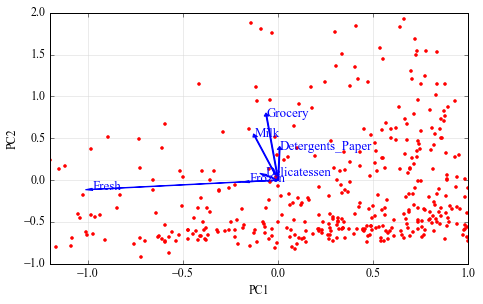

In [61]:
# Get the first two principal components (vectors) 
# Assign randomly each component as X-axis and Y-axis of the plot
xcomponent = pca.components_[0]
ycomponent = pca.components_[1]

#data_2d = PCA(n_components=2).fit_transform(scaler.transform(data))
data_2d = pca.transform(data)

# Plot the first two principal component loading vectors for each feature. 
fig_2 = plt.figure(figsize=[7.5, 4.5])
for i in xrange(len(xcomponent)):
    plt.arrow(0, 0, xcomponent[i], ycomponent[i], 
              color='b', width=0.005, head_width=0.025)
    plt.text(xcomponent[i], ycomponent[i], 
             list(data.columns.values)[i], color='b', fontsize=13)
    
for i in xrange(data_2d.shape[0]):
    plt.plot(data_2d[i, 0], data_2d[i, 1], '.r')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim([-1.2, 1.0])
plt.ylim([-1, 2.0])
plt.grid(True, ls='-', color='0.85')
fig_2.axes[0].set_axisbelow(True)

### ICA

In [44]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data)
ica = FastICA(n_components=data.shape[1], whiten=True)
ica.fit(scaler.transform(data))
# Print the independent components
print ica.components_

[[-0.00345674  0.01907846  0.10904733 -0.00724434 -0.133374   -0.01613569]
 [-0.00212768 -0.07210404  0.05623421  0.00163947 -0.01792309  0.01683208]
 [-0.00489462 -0.00167653 -0.00558616 -0.00253103  0.00243476  0.05097092]
 [-0.05025619  0.00662691  0.00698112  0.00323284 -0.01107771  0.00272178]
 [ 0.01090925  0.00105894 -0.00738772 -0.05405416  0.00258675  0.01676361]
 [-0.00248092  0.01354047 -0.06928268 -0.00143989  0.01316431  0.00506261]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: The ICA components represent the set of independent basis vectors in the feature space (6 dimensions). All the feature vectors (corresponding to a particular customer sample, a row in our dataset) can be expressed as linear combinations of these 6 basis vectors. Each component of ICA represents the linear combination weights
for the original features to obtain the independent source feature vectors. 

First ICA component   
[-0.00345674  0.01907846  0.10904733 -0.00724434 -0.133374   -0.01613569]   
corresponds to customers/businesses who are spending more on Grocery and Detergents_Paper.

Second ICA component   
[-0.00212768 -0.07210404  0.05623421  0.00163947 -0.01792309  0.01683208]  
corresponds to customers/businesses who are spending more on Milk and Grocery.

Third ICA component  
[-0.00489462 -0.00167653 -0.00558616 -0.00253103  0.00243476  0.05097092]    
clearly corresponds to a large amount of spending on Delicatessen. May be these customers are restaurants/delis.

Fifth ICA component    
[ 0.01090925  0.00105894 -0.00738772 -0.05405416  0.00258675  0.01676361]    
corresponds to customers spending more on Fresh and Frozen food.   

It is difficult to interpret the other ICA components.

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: KMeans is a low complexity clustering technique based on Llyod's algorithm. It is based on an optimization problem whose objective function uses the L2 norm. This makes it more biased towards spherical clusters. Moreover, KMeans makes a hard assignment of the data points to a cluster. 

GMMs use the EM algorithm which is based on optimization using probabilities instead of distance metrics. It performs soft assignment that is it provides the probability of any given point belonging to a particular centroid. 

KMeans is a particular instance of the EM algorithm when the data has a diagonal covariance matrix. That is the features are uncorrelated. In this project, we want to perform clustering on the PCA reduced features, which are uncorrelated and hence KMeans is a suitable choice. 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [37]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

### KMeans - 2 Clusters

In [38]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [43]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
clusters = KMeans(init='k-means++', n_clusters=2, n_init=10)
clusters.fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [44]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [45]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print centroids

[[  4175.31101293   -211.15109304]
 [-24088.33276689   1218.17938291]]


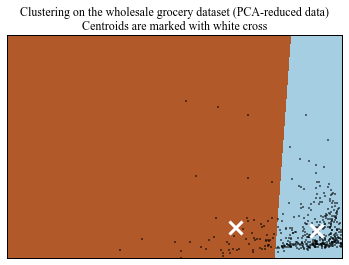

In [46]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### KMeans - 3 Clusters

In [56]:
clusters = KMeans(init='k-means++', n_clusters=3, n_init=10)
clusters.fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [57]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [58]:
centroids = clusters.cluster_centers_
print centroids

[[  4106.90273941  -3168.41202086]
 [  1497.13461172  24998.27760147]
 [-24220.71188261  -4364.45560022]]


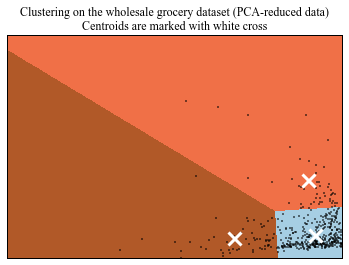

In [59]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: We find that KMeans with 3 clusters represents the PCA reduced data well. From the figure above, we clearly observe that the 3 cluster centroids represent customers as follows. Recall that the PCA features, PC1 (X-axis) corresponds to group of "Fresh and Frozen foods" and PC2 (Y-axis) corresponds to the group of "Milk, Grocery, Detergents_Paper" group. 
 - Small volume (amount of spending) customers across both the PCA features. 
 - Customers with large amounts of spending for PC1 but relatively smaller amount of spending for PC2 products. 
 - Customers with large amounts of spending for PC2 but relatively smaller amount of spending for PC1 products. 

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: PCA provides the most insight into the data. The power of PCA lies in automatically identifying any underlying structure in the data with little external input (for e.g., KMeans requires that the user specify the number of clusters). Also as shown in this project, PCA can often be used together with clustering techniques like KMeans to get more insight into the data. 

**9)** How would you use that technique to help the company design new experiments?

Answer: Based on the PCA results presented in this project, the company could improve its A/B testing by implementing the change of delivery method on one set of customers for instance, say the small volume/spending customers. Then it would immediately show that the small volume/spending customers are not happy with the evening delivery option. 

**10)** How would you use that data to help you predict future customer needs?

Answer: These results can be used in a subsequent supervised learning problem where the company could predict the if the customer is small/large volume customer based on the PCA features and subsequently decide to adopt customized delivery methods for groups of customers. 